# Enes Kılıçarslan - 17011011 

### Data Mining Project - Mesothelioma Data Set Analysis and Mining

Before starting the project I've examined the .xlsx file and captured something worth to mention at the beginning. One of the features is exactly the same with the output class. To demonstrate that, I've been doing the things down below. So actual process starts after the workaround in the dataset. Thanks!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support

#### Data Description
In order to perform the research reported, the patient’s hospital reports from Dicle University, Faculticity of Medicine were
used in this work. One of the special characteristic of this diagnosis study is to use the real dataset composed from patient reports of this hospital. Three hundred and twenty-four MM patient data were diagnosed and treated. These data were
investigated retrospectively and analysed files.

In [2]:
dataset = pd.read_csv('Mesothelioma_data_set.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

#### Data Visualization

In [3]:
dataset.head(3)

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
0,47.0,1,0,1,0.0,20.0,1,0,1,24.0,...,289.0,0.0,0.0,79.0,1,0.0,0.0,0.0,34,1
1,55.0,1,0,1,0.0,45.0,1,0,0,1.0,...,7541.0,1.6,0.8,6.0,1,1.0,1.0,1.0,42,1
2,29.0,1,1,1,0.0,23.0,0,1,0,1.0,...,480.0,0.0,0.0,90.0,1,0.0,0.0,0.0,43,2


##### What are the attributes?

In [4]:
dataset.columns

Index(['age', 'gender', 'city', 'asbestos exposure', 'type of MM',
       'duration of asbestos exposure', 'diagnosis method', 'keep side',
       'cytology', 'duration of symptoms', 'dyspnoea', 'ache on chest',
       'weakness', 'habit of cigarette', 'performance status', 'white blood',
       'cell count (WBC)', 'hemoglobin (HGB)', 'platelet count (PLT)',
       'sedimentation', 'blood lactic dehydrogenise (LDH)',
       'alkaline phosphatise (ALP)', 'total protein', 'albumin', 'glucose',
       'pleural lactic dehydrogenise', 'pleural protein', 'pleural albumin',
       'pleural glucose', 'dead or not', 'pleural effusion',
       'pleural thickness on tomography', 'pleural level of acidity (pH)',
       'C-reactive protein (CRP)', 'class of diagnosis'],
      dtype='object')

##### Class Label Distribution

In [5]:
dataset['class of diagnosis'].value_counts()

1    228
2     96
Name: class of diagnosis, dtype: int64

class of diagnosis (1:Healthy, 2: Mesothelioma)

In [6]:
print(X)

[[47.  1.  0. ...  0.  0. 34.]
 [55.  1.  0. ...  1.  1. 42.]
 [29.  1.  1. ...  0.  0. 43.]
 ...
 [58.  1.  6. ...  0.  1. 68.]
 [42.  1.  6. ...  1.  0. 78.]
 [54.  1.  0. ...  1.  0. 45.]]


In [7]:
print(y[:5], y.size)

[1 1 2 1 1] 324


### ****
For some classifier methods we need to use class label's starting from 0. In order to do it we are changing the class labels.

In [8]:
for i in range(y.size):
    if y[i]==1:
        y[i]=0
    else:
        y[i]=1

In [9]:
print(y[:5], y.size)

[0 0 1 0 0] 324


### ***
Since our dataset is consist of both categorical and numeric data we need to convert the categoric data into number attributes.
If we investigate furtherly, all categorical data comes with numeric attribute which is nice for us.

numeric features=> age, duration of asbestos exposure, duration of symptoms, white blood, cell count (WBC), platelet count(PLT), 
sedimentation, blood lactic dehydrogenise (LDH), alkaline phosphatise (ALP), total protein, albumin,
glucose, pleural lactic dehydrogenise, pleural protein, pleural albumin, pleural glucose, C-reactive protein (CRP)

### Train-Test Split Before Normalization and stuff

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=7)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler((-1,1))
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
y=y

### ***
We are using a classifier method for understanding the content of features. If something is not right we need to solve it first, then go on.

In [12]:
model=XGBClassifier()
model.fit(x_train,y_train)

[16:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\enes\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

100.0


In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
y_pred = classifier.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[48  0]
 [ 0 17]]


1.0

### ***
Both classification methods gave %100 accuracy. That is not exactly we have wanted. Let's see what does tree consist of.

[Text(167.4, 163.07999999999998, 'X[6] <= 0.0\nentropy = 0.887\nsamples = 259\nvalue = [180, 79]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 79\nvalue = [0, 79]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 180\nvalue = [180, 0]')]

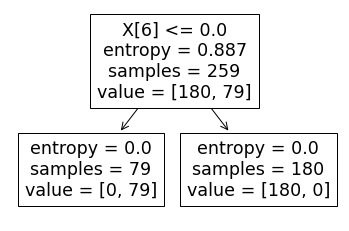

In [17]:
from sklearn import tree
tree.plot_tree(classifier)

Our model gives %100 accuracy for both classification methods.
When we check the Decision Tree, entropy of X[6] is very high and gives absolute success.
If we examine the dataset, we come up with the idea X[6]:diagnosis method's outputs are exactly the same with class label.
We are going to eliminate this feature for further operations to get a **reliable** model.

In [18]:
dataset = pd.read_csv('Mesothelioma_data_set.csv')
dataset = dataset.drop(columns=['diagnosis method']) ### dropping the spoilsport feature
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [19]:
for i in range(y.size):
    if y[i]==1:
        y[i]=0
    else:
        y[i]=1

In [20]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X)
y=y


x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=7)

In [21]:
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[38 10]
 [ 7 10]]


0.7384615384615385

[Text(224.10978260869567, 210.645, 'X[6] <= 1.5\nentropy = 0.887\nsamples = 259\nvalue = [180, 79]'),
 Text(132.82826086956524, 197.055, 'X[17] <= 190.5\nentropy = 0.849\nsamples = 240\nvalue = [174, 66]'),
 Text(48.52173913043479, 183.465, 'X[25] <= 4.95\nentropy = 0.998\nsamples = 40\nvalue = [19, 21]'),
 Text(38.81739130434783, 169.875, 'X[0] <= 55.0\nentropy = 0.946\nsamples = 33\nvalue = [12, 21]'),
 Text(19.408695652173915, 156.285, 'X[20] <= 43.0\nentropy = 0.337\nsamples = 16\nvalue = [1, 15]'),
 Text(9.704347826086957, 142.695, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(29.11304347826087, 142.695, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(58.22608695652174, 156.285, 'X[5] <= 38.0\nentropy = 0.937\nsamples = 17\nvalue = [11, 6]'),
 Text(48.52173913043479, 142.695, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(67.9304347826087, 142.695, 'X[19] <= 132.5\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]'),
 Text(58.22608695652174, 129.10500000000002, 'en

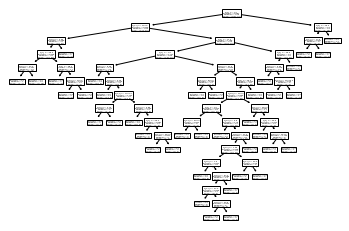

In [23]:
from sklearn import tree
tree.plot_tree(classifier)

### Purified Data
Now we are eliminated all spoilsport features, we can move on actual process

## PREPROCESS
### ££ Feature Normalization ££
Min Max Normalization already done while testing the Decision Tree Accuracy.

### ££ Feature Selection (ANOVA f-test Feature Selection) ££
Since we have numeric data and categoric output (with numeric labels) we are going to use ANOVA f-test Feature Selection.
Which includes selecting K best features using f_classif score function. 

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

feature_select = SelectKBest(score_func=f_classif, k=23)                 
feature_select.fit(x_train, y_train)                                               
x_train = feature_select.transform(x_train)                                        
x_test = feature_select.transform(x_test)                                          

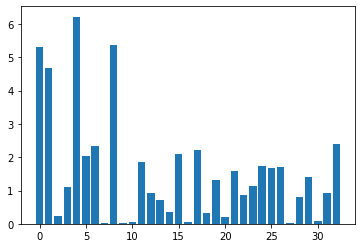

New Feature Count:  (259, 23) - (65, 23)


In [25]:
plt.bar([i for i in range(len(feature_select.scores_))], feature_select.scores_)
plt.show()

print("New Feature Count: ", x_train.shape,"-",x_test.shape)

As we can see in the plot, first **23~ish** feature out of 32 (33-1 dropped feature) are effecting the most.

### ££ Outlier Analysis (LOF - kNN) ££
Since we have multidimensional dataset, **Local Outlier Factor** used with **kNN** would fit perfect in our case.

<AxesSubplot:xlabel='duration of symptoms'>

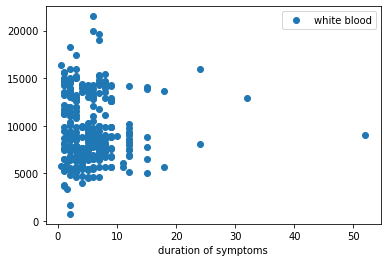

In [26]:
dataset.plot(x = "duration of symptoms", y="white blood", style="o")

There is 23x23=529 **feature x feature** combination. To eliminate all of the controls we can use LOF.

In [27]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=3)         
yhat = lof.fit_predict(x_train)
mask = yhat != -1                                    
x_train, y_train = x_train[mask, :], y_train[mask]

In [28]:
print("New Feature Count: ", x_train.shape,"-",x_test.shape)

New Feature Count:  (234, 23) - (65, 23)


## CLASSIFICATION
### ££ Decision Tree ££

[Text(214.675, 203.85, 'X[5] <= 1.5\nentropy = 0.89\nsamples = 234\nvalue = [162, 72]'),
 Text(131.75, 176.67000000000002, 'X[11] <= 178.5\nentropy = 0.844\nsamples = 217\nvalue = [158, 59]'),
 Text(49.6, 149.49, 'X[17] <= 4.15\nentropy = 0.99\nsamples = 34\nvalue = [15, 19]'),
 Text(24.8, 122.31, 'X[0] <= 56.5\nentropy = 0.702\nsamples = 21\nvalue = [4, 17]'),
 Text(12.4, 95.13, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(37.2, 95.13, 'X[6] <= 7.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(24.8, 67.94999999999999, 'X[11] <= 140.0\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(12.4, 40.77000000000001, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(37.2, 40.77000000000001, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(49.6, 67.94999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(74.4, 122.31, 'X[14] <= 2.75\nentropy = 0.619\nsamples = 13\nvalue = [11, 2]'),
 Text(62.0, 95.13, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(8

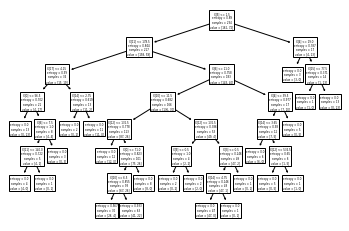

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=7)
classifier.fit(x_train, y_train)

plot_tree(classifier)

In [30]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print("---- Decision Tree ----\n***********************\n",cm)
print("accuracy score:",accuracy_score(y_test, y_pred))
print("f1 score:",f1_score(y_test, y_pred))

---- Decision Tree ----
***********************
 [[46  2]
 [11  6]]
accuracy score: 0.8
f1 score: 0.48


### ££ Naive Bayes Classification ££

In [31]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(x_train, y_train)

y_pred = bayes.predict(x_test)

In [32]:
print("---- Naive Bayes ----\n***********************\n")
print("accuracy score:",accuracy_score(y_test, y_pred))
print("f1 score:",f1_score(y_test, y_pred))

---- Naive Bayes ----
***********************

accuracy score: 0.7538461538461538
f1 score: 0.4666666666666667


##### Low f1 scores shows that our dataset is like fraud detection with high accuracy and low f1 score. 

### ££ Random Forest Classifier ££

In [33]:
from sklearn.ensemble import RandomForestClassifier
rndFor = RandomForestClassifier(max_depth=2, random_state=0)
rndFor.fit(x_train, y_train)

y_pred = rndFor.predict(x_test)

In [34]:
print("---- Naive Bayes ----\n***********************\n")
print("accuracy score:",accuracy_score(y_test, y_pred))
print("f1 score:",f1_score(y_test, y_pred))

---- Naive Bayes ----
***********************

accuracy score: 0.7384615384615385
f1 score: 0.0


### ££ K Neighbors Classifier ££

In [35]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

y_pred = neigh.predict(x_test)

In [36]:
print("---- K Neighbors Classifier ----\n***********************\n")
print("accuracy score:",accuracy_score(y_test, y_pred))
print("f1 score:",f1_score(y_test, y_pred))

---- K Neighbors Classifier ----
***********************

accuracy score: 0.8
f1 score: 0.6060606060606061


### ££ Ada Boost Classifier ££

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

In [38]:
print("---- Ada Boost Classifier ----\n***********************\n")
print("accuracy score:",accuracy_score(y_test, y_pred))
print("f1 score:",f1_score(y_test, y_pred))

---- Ada Boost Classifier ----
***********************

accuracy score: 0.7538461538461538
f1 score: 0.4666666666666667


### ££ Extra Gradient Boost Classsifier ££

In [39]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

y_pred = xgb.predict(x_test)

[16:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\enes\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [40]:
print("---- Extra Gradient Boost Classifier ----\n***********************\n")
print("accuracy score:",accuracy_score(y_test, y_pred))
print("f1 score:",f1_score(y_test, y_pred))

---- Extra Gradient Boost Classifier ----
***********************

accuracy score: 0.7384615384615385
f1 score: 0.41379310344827586


## ££ Conclusion ££

With the highest accuracy and f1 score, **KNN Classifier** is the best classification method to choose.

## CLUSTERING

In clustering, we won't be using test data. We can move on with only the train data.

In [41]:
X = x_train
y = y_train

We are searching for nearest graph to the one on down below

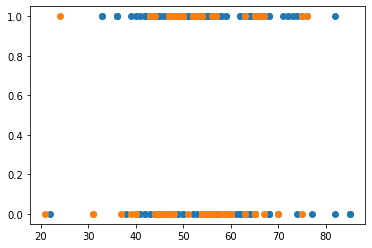

In [44]:
from numpy import unique
from numpy import where
from matplotlib import pyplot

for class_value in range(2):
	row_ix = where(y == class_value)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

### £££ K Means Clustering £££

In [45]:
from sklearn.cluster import KMeans
                                                                      
kmean = KMeans(n_clusters=2, random_state=np.random.RandomState(17))  
y_pred = kmean.fit_predict(X)                                         

<AxesSubplot:>

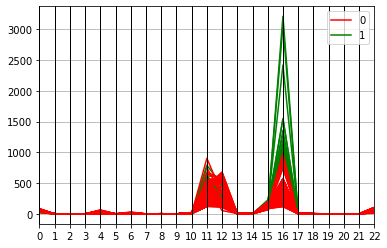

In [46]:
cluster_df = pd.DataFrame(X)
cluster_df['class'] = y_pred
pd.plotting.parallel_coordinates(cluster_df, 'class', color=['red', 'green'])

<AxesSubplot:>

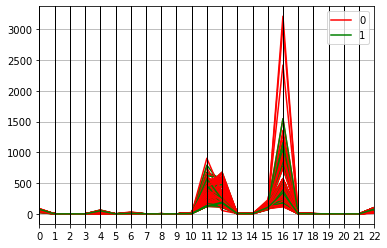

In [47]:
cluster_df['class'] = y
pd.plotting.parallel_coordinates(cluster_df, 'class', color=['red', 'green'])

In [48]:
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print('Accuracy : ', acc)
print('F1-Score : ', f1)

Accuracy :  0.6752136752136753
F1-Score :  0.11627906976744186


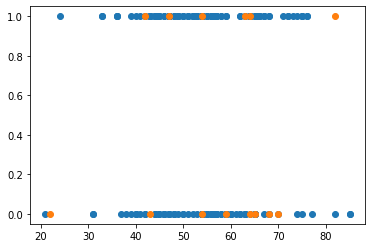

In [49]:
from numpy import unique
from numpy import where
from matplotlib import pyplot

model = KMeans(n_clusters=2)
model.fit(X)

yhat = model.predict(X)

clusters = unique(yhat)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

### Comment
As we can see in the real clusters, our data is very crowded in attribute and class order. We need to change our dimensions to get a clear comparison.

### £££ Expectation Maximization Clustering £££

In [50]:
from sklearn.mixture import GaussianMixture
                                                                                
em = GaussianMixture(n_components=2, random_state=np.random.RandomState(13)) 
y_pred = em.fit_predict(X)                                                   

<AxesSubplot:>

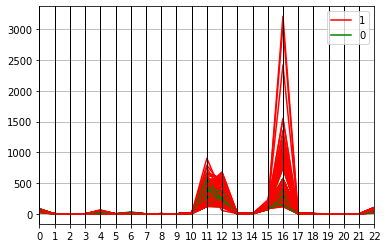

In [51]:
cluster_df = pd.DataFrame(X)
cluster_df['class'] = y_pred
pd.plotting.parallel_coordinates(cluster_df, 'class', color=['red', 'green'])

<AxesSubplot:>

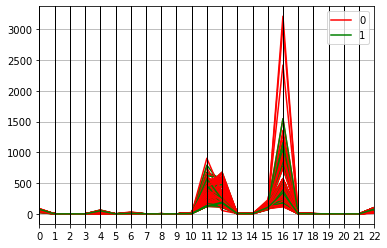

In [52]:
cluster_df['class'] = y
pd.plotting.parallel_coordinates(cluster_df, 'class', color=['red', 'green'])

In [53]:
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print('Accuracy : ', acc)
print('F1-Score : ', f1)

Accuracy :  0.3418803418803419
F1-Score :  0.40310077519379844


### £££ Agglomerative Clustering £££

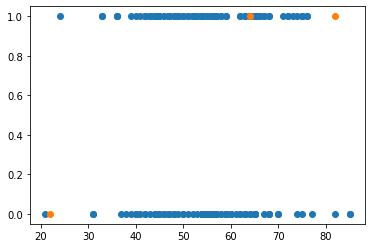

Accuracy :  0.6794871794871795


In [54]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
y_pred = model.fit_predict(X)

clusters = unique(y_pred)
for cluster in clusters:                        ###For each cluster [0,1] take scatter values
	row_ix = where(y_pred == cluster)           ###Cluster-0 and cluster-1 are going to be the row values
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])  ###Scatter values

pyplot.show()

acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print('Accuracy : ', acc)

### £££ Other Clustering Methods £££
##### Meanshift

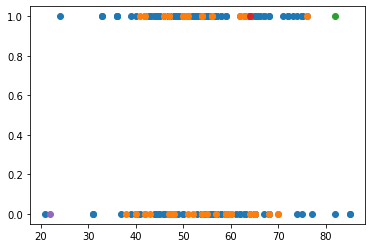

Accuracy :  0.6282051282051282


In [55]:
from sklearn.cluster import MeanShift
model = MeanShift()

yhat = model.fit_predict(X)
clusters = unique(yhat)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

acc = accuracy_score(y, yhat)
print('Accuracy : ', acc)

##### OPTICS

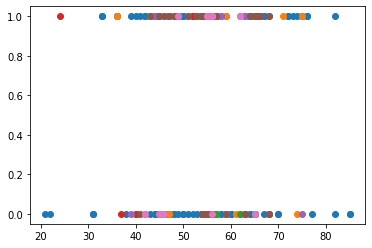

Accuracy :  0.06837606837606838


In [56]:
from sklearn.cluster import OPTICS
model = OPTICS(eps=0.8, min_samples=10)

yhat = model.fit_predict(X)
clusters = unique(yhat)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

acc = accuracy_score(y, yhat)
print('Accuracy : ', acc)

##### Affinity Propagation

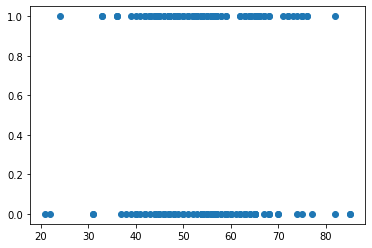

Accuracy :  0.6923076923076923


In [57]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9, random_state=0)

model.fit(X)
yhat = model.predict(X)
clusters = unique(yhat)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

acc = accuracy_score(y, yhat)
print('Accuracy : ', acc)

##### BIRCH

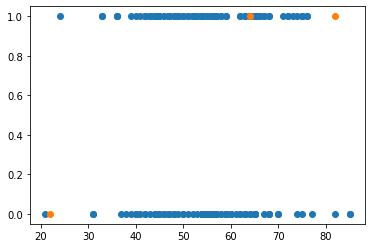

Accuracy :  0.6794871794871795


In [58]:
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=2)

model.fit(X)
yhat = model.predict(X)
clusters = unique(yhat)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

acc = accuracy_score(y, yhat)
print('Accuracy : ', acc)

### £££ Conclusion £££

If we look at all clustering methods, we easily can say that our supervised dataset does not work with the clustering methods.

But in this cluster of clustering methods, 3 of them distinguished from all.

*   K-means                  => 0.6752136752136753 *(with very low f_score)* 
   
*   EM                   => 0.3418803418803419
   
*   **Agglomerative        => 0.6794871794871795**
   
*   Meanshift            => 0.6282051282051282
   
*   OPTICS               => 0.06837606837606838
   
*   **Affinity Propagation => 0.6923076923076923**
   
*   **BIRCH                => 0.6794871794871795**
   
##### Agglomerative method involves merging examples until the desired number of clusters is achieved. In our case it is useful because of the merging features, just like the hospitals. Each test result leads to another and comes with an conclusion.

##### Affinity Propagation finds a set of example that best summarize the data. That would do just well on a supervised dataset in use of unsupervised methods.

##### BIRCH (Balanced Iterative Reducing and Clustering) uses a tree structure to demonstrate the dataset. Just like the above clustering that would do nice on our dataset.

# ENDING

#### At the end of all processes, we can lead to 3 main inferences:
* #### Always check up dataset before starting the classification and clustering.
* #### Supervised datasets are working best with the classification algorithms.
* #### Preprocessing (outlier analysis, normalization, feature reduction or selection etc.) is an important part of data mining.

## For our Data-set 

* #### Best Classification : KNN Classifier
* #### Best Clustering : Affinity Propagation
* #### Performed Processes : 
    * Normalization (Min-Max)
    * Feature Selection (ANOVA)
    * Anomaly - Outlier Analysis (LOF-kNN)
    * Classification (XGBClassifier, Ada Boost Classifier, Decision Tree, Naive Bayes Classification, Random Forest Classifier, k Neighbors Classifier) 
    * Clustering (K-means, EM, Agglomerative, Meanshift, OPTICS, Affinity Propagation, BIRCH)           